In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Lendo CSV

In [2]:
# Lendo csv
df = pd.read_csv("casos_attr_2015.csv")

In [3]:
# convertando booleanos para inteiros
bool_columns = [u'penalty_AGP', u'penalty_BGK', u'penalty_AVJLP', u'penalty_BGP',
                u'basic payment', u'penalty_AJLP', u'greening', u'penalty_AVGP',
                u'penalty_C16', u'penalty_B16', u'penalty_AVBP', u'selected_manually',
                u'penalty_C9', u'penalty_C4', u'penalty_B5', u'selected_random',
                u'penalty_AUVP', u'penalty_AVUVP', u'rejected', u'penalty_V5',
                u'penalty_BGKV', u'penalty_B5F', u'selected_risk', u'penalty_GP1',
                u'small farmer', u'penalty_CC', u'penalty_JLP5', u'penalty_JLP6',
                u'penalty_JLP7', u'penalty_JLP1', u'penalty_JLP2', u'penalty_JLP3',
                u'penalty_ABP', u'penalty_B6', u'penalty_B4', u'redistribution',
                u'penalty_B2', u'penalty_B3', u'young farmer']
df[bool_columns] *= 1

# removendo colunas do tipo textual
string_columns = [u'applicant', u'concept:name', u'application', u'department',
                  u'start_time', u'identity:id', u'end_time']
df = df.drop(string_columns, axis=1)

### Descrevendo atributos

In [4]:
# total de aplicações
n_rows = df.shape[0]
# total de aplicações com 'finish payment'
n_rows_f_p = df[df['finish payment'] == 1].shape[0]
# lista de atributos
attr_names = list(df.columns.values)

df_f_p = df[df['finish payment'] == 1]

# criando tabela
table = pd.DataFrame(data={u"Coluna" : attr_names})
table[u'Total de val. únicos != 0'] = [len(list(df[df[k] > .0][k])) for k in df.columns.values]
table[u" % "] = [(float(v) / n_rows) * 100 for v in df.count()]
table[u"Total de val. únicos != 0' c/ 'finish payment'"] = [len(list(df_f_p[df_f_p[k] > .0][k])) for k in df.columns.values]
table[u" %  "] = [(float(v) / n_rows_f_p) * 100 for v in df_f_p.count()]

# ordenando pelo %
table = table.sort_values([u" %  "])

In [5]:
table.head(15)

,Coluna,Total de val. únicos != 0,%,Total de val. únicos != 0' c/ 'finish payment',%
30,payment_actual3,2,0.047458,1,0.023135
24,amount_applied3,7,0.047458,2,0.023135
31,penalty_amount3,7,0.047458,2,0.023135
28,payment_actual2,23,0.725424,15,0.636206
25,amount_applied2,103,0.725424,55,0.636206
32,penalty_amount2,102,0.725424,54,0.636206
29,penalty_amount1,1603,11.830508,1065,12.978600
37,payment_actual1,361,11.830508,183,12.978600
42,amount_applied1,1672,11.830508,1113,12.978600
53,penalty_ABP,248,100.000000,182,100.000000


### Lista de atributos sem valores para o ano

In [6]:
# atributos nulos para ambos os tipos
table_0 =  table[table[u'Total de val. únicos != 0'] == 0]
table_0

,Coluna,Total de val. únicos != 0,%,Total de val. únicos != 0' c/ 'finish payment',%
33,penalty_AVUVP,0,100.0,0,100.0
35,penalty_V5,0,100.0,0,100.0
38,penalty_BGKV,0,100.0,0,100.0
39,penalty_B5F,0,100.0,0,100.0
46,penalty_JLP5,0,100.0,0,100.0
47,penalty_JLP6,0,100.0,0,100.0
48,penalty_JLP7,0,100.0,0,100.0
2,penalty_BGK,0,100.0,0,100.0
6,penalty_BGP,0,100.0,0,100.0
21,penalty_B5,0,100.0,0,100.0


In [7]:
# atributos nulos para as aplicações com o 'finish payment'
table_01 =  table[table[u"Total de val. únicos != 0' c/ 'finish payment'"] == 0]
table_01

,Coluna,Total de val. únicos != 0,%,Total de val. únicos != 0' c/ 'finish payment',%
33,penalty_AVUVP,0,100.0,0,100.0
35,penalty_V5,0,100.0,0,100.0
38,penalty_BGKV,0,100.0,0,100.0
39,penalty_B5F,0,100.0,0,100.0
46,penalty_JLP5,0,100.0,0,100.0
47,penalty_JLP6,0,100.0,0,100.0
48,penalty_JLP7,0,100.0,0,100.0
2,penalty_BGK,0,100.0,0,100.0
6,penalty_BGP,0,100.0,0,100.0
10,penalty_AVGP,1,100.0,0,100.0


## Listando apenas atributos "válidos"

In [8]:
atributos = list(table[table[u"Total de val. únicos != 0' c/ 'finish payment'"] > 0][u'Coluna'])

new_df = df[atributos]

# total de aplicações
n_rows = new_df.shape[0]
# total de aplicações com 'finish payment'
n_rows_f_p = new_df[new_df['finish payment'] == 1].shape[0]

df_f_p = new_df[new_df['finish payment'] == 1]

# criando tabela
table_2 = pd.DataFrame(data={u"Coluna" : atributos})
table_2[u'Total de val. únicos != 0'] = [len(list(new_df[new_df[k] > .0][k])) for k in atributos]
table_2[u" % "] = [(float(v) / n_rows) * 100 for v in new_df.count()]
table_2[u'Avg'] = [new_df[new_df[k] > .0][k].mean() for k in atributos]
table_2[u'Max'] = [new_df[new_df[k] > .0][k].max() for k in atributos]
table_2[u'Min'] = [new_df[new_df[k] > .0][k].min() for k in atributos]
table_2[u"Total de val. únicos != 0' c/ 'finish payment'"] = [len(list(df_f_p[df_f_p[k] > .0][k])) for k in atributos]
table_2[u" %  "] = [(float(v) / n_rows_f_p) * 100 for v in df_f_p.count()]
table_2[u'Avg '] = [df_f_p[df_f_p[k] > .0][k].mean() for k in atributos]
table_2[u'Max '] = [df_f_p[df_f_p[k] > .0][k].max() for k in atributos]
table_2[u'Min '] = [df_f_p[df_f_p[k] > .0][k].min() for k in atributos]
table_2[u'Var '] = [df_f_p[df_f_p[k] > .0][k].var() for k in atributos]

# ordenando pela variiancia
table_2 = table_2.sort_values([u'Var '], ascending=False)
table_2.head(20)

,Coluna,Total de val. únicos != 0,%,Avg,Max,Min,Total de val. únicos != 0' c/ 'finish payment',%,Avg,Max,Min,Var
8,amount_applied1,1672,11.830508,61356.396573,587892.030000,313.320000,1113,12.978600,55318.431141,587821.120000,313.320000,9.221998e+09
1,amount_applied3,7,0.047458,165400.820000,587261.110000,50436.050000,2,0.023135,103755.235000,150959.870000,56550.600000,4.456555e+09
4,amount_applied2,103,0.725424,89063.683495,587833.230000,1199.840000,55,0.636206,58510.525818,154307.160000,1199.840000,2.146400e+09
45,amount_applied0,14744,100.000000,24098.070608,587772.080000,346.160000,8642,100.000000,17214.203106,587772.080000,346.160000,1.835813e+09
23,payment_actual0,14748,100.000000,23786.867771,587683.930000,0.350000,8643,100.000000,17001.249897,587648.480000,2.350000,1.823581e+09
3,payment_actual2,23,0.725424,1888.723913,18186.340000,9.580000,15,0.636206,1881.494000,18186.340000,33.030000,2.095929e+07
5,penalty_amount2,102,0.725424,1404.854020,31241.390000,24.500000,54,0.636206,1406.221852,31241.390000,24.500000,1.834454e+07
7,payment_actual1,361,11.830508,1766.003546,35716.710000,0.190000,183,12.978600,1359.600164,18768.810000,0.440000,5.265834e+06
6,penalty_amount1,1603,11.830508,698.915845,31241.380000,1.710000,1065,12.978600,585.208188,31241.380000,1.710000,2.112333e+06
2,penalty_amount3,7,0.047458,1365.981429,3314.650000,211.140000,2,0.023135,1080.970000,1788.950000,372.990000,1.002471e+06


### Verificando a Importância das variáveis considerando apenas os atributos 'válidos'

In [9]:
# removendo colunas com NAN
new_df = new_df.dropna(axis=1, how='any')

# movendo coluna 'finish payment' para o final
cols = list(new_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('finish payment')) #Remove b from list
new_df = new_df[cols + ['finish payment']]

# Copiando os dados do csv
data = new_df.values.copy()

# Separando atributos de classes
x = data[:, :-1]  # x tem apenas valores entre a primeira e penúltima coluna
y = data[:, -1]  # y tem os valores da última coluna
y = [1 if i else 0 for i in y]

# 70% dos dados serão utilizados para treinamento e 30% para o teste
# A divisão será estratificada, serão mantidas as proporções de spam e não spam em cada grupo
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.7, stratify=y)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
x_treino.shape

(10325, 38)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Classificando com uma floresta árvores de decisão
cls_rf = RandomForestClassifier(n_estimators=100)
cls_rf.fit(x_treino, y_treino)
y_pred_rf = cls_rf.predict(x_teste)

print "Floresta árvores de decisão"
print classification_report(y_pred_rf, y_teste)

Floresta árvores de decisão
             precision    recall  f1-score   support

          0       0.92      0.87      0.90      1931
          1       0.91      0.94      0.92      2494

avg / total       0.91      0.91      0.91      4425



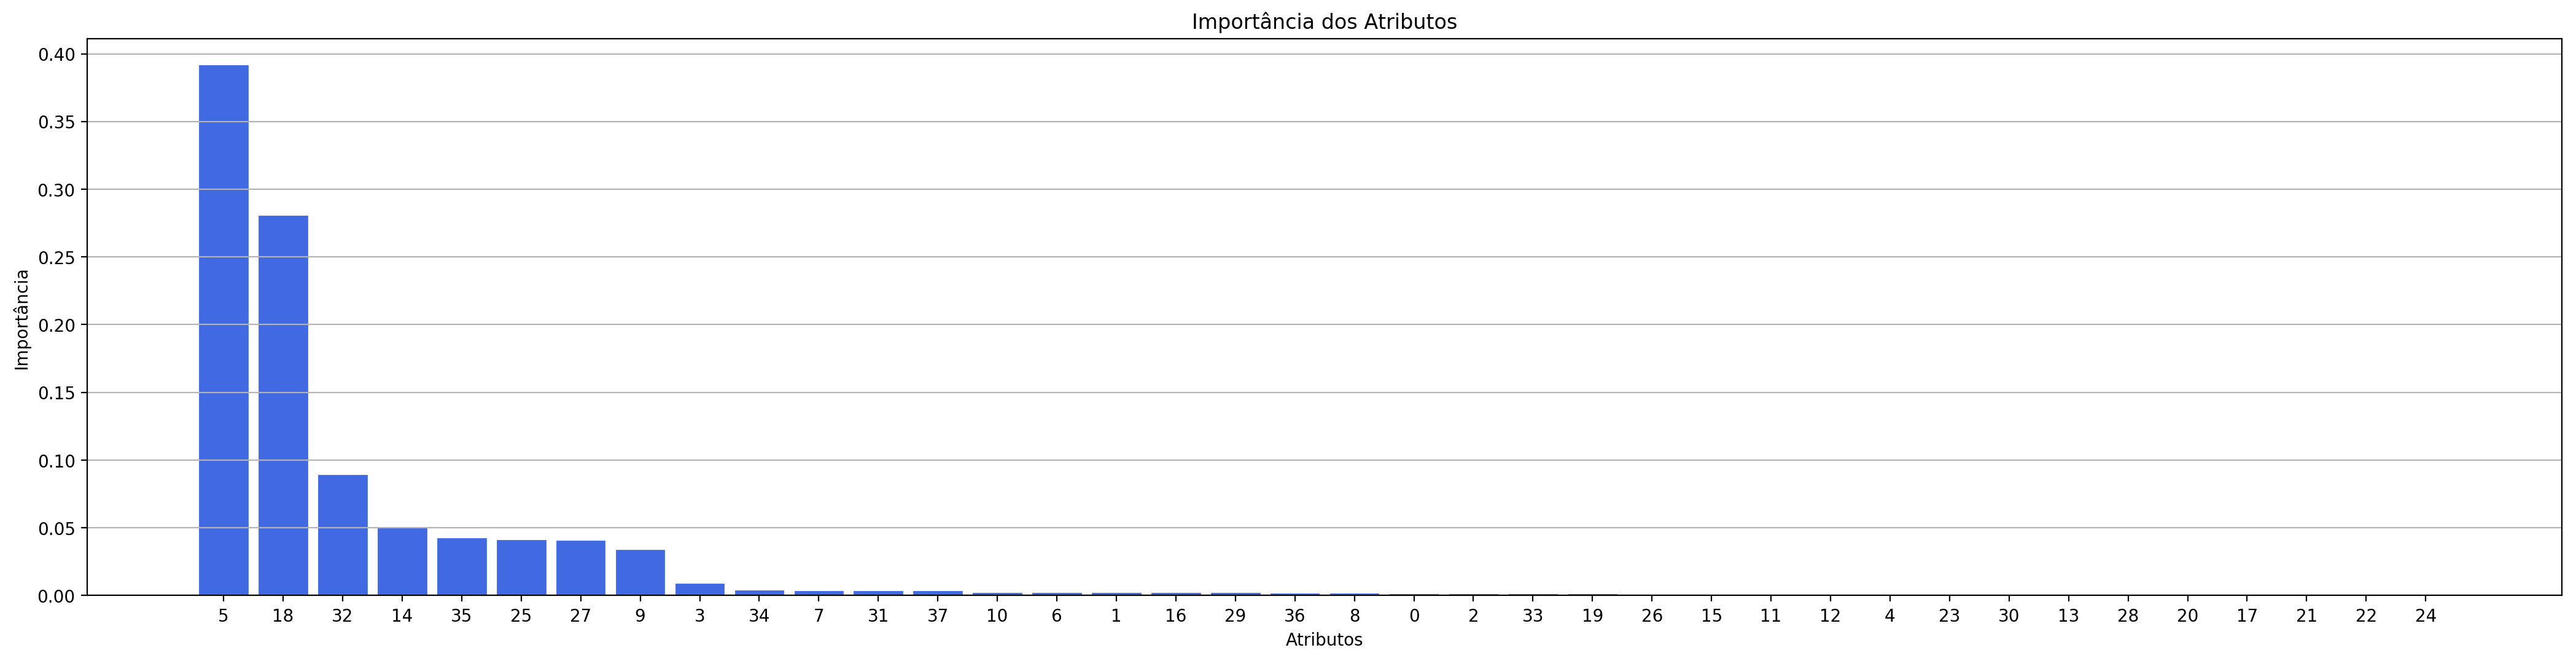

In [12]:
importances = cls_rf.feature_importances_
indices =  np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(26, 6), dpi=200)
plt.title(u"Importância dos Atributos")
plt.grid(b=True, which='both', color='0.7',linestyle='-', axis='y')
plt.xticks(range(len(indices)), indices)
plt.bar(range(len(indices)), importances[indices], color="#4169E1", align="center",edgecolor="#4169E1")
plt.xlabel(u"Atributos")
plt.ylabel(u"Importância")
plt.show()

In [13]:
colunas = list(new_df.columns.values)
for i in indices[:20]:
    print i, colunas[i]

5 delta_time
18 avg_event_interval
32 tot_events
14 payment_actual0
35 amount_applied0
25 number_parcels
27 area
9 penalty_amount0
3 penalty_B2
34 selected_random
7 penalty_GP1
31 cross_compliance
37 young farmer
10 penalty_CC
6 selected_risk
1 penalty_B3
16 small farmer
29 selected_manually
36 penalty_AUVP
8 penalty_B4
